In [238]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import linalg as LA

# Exercise H4.2: 
Comparison of gradient descent methods (homework, 6 points)

In this exercise we compare the performance of three learning procedures applied to a simple connectionist neuron with a linear output function. All procedures will compute the gradient using the entire training set (batch gradient descent). The procedures are:

(i) Gradient (or steepest) descent with constant learning rate,

(ii) steepest descent combined with a line search method to determine the learning rate, and

(iii) the conjugate gradient method.

In [239]:
#Data from task
#2x3
X = np.array([[1, -1], [1, 0.3], [1, 2]]).T
#1x3
Y_true = np.array([[-0.1, 0.5, 0.5]])

#2x1
w1 = np.array([[-0.45, 0.2]]).T

(a) (2 points) Gradient Descent: Implement a steepest descent procedure where the weights at iteration t + 1 are calculated using the weights and the gradient at iteration t

In [240]:
#2x1
w = w1
nu = 0.01
for i in np.arange(100):
    #2x2
    H = 1/3 * X @ X.T
    #2x1
    g = (H @ w[:,i]).reshape(2,1) - 1/3 * X @ Y_true.T
    #2x1
    new_w = (w[:,i]).reshape(2,1) - nu * g
    #2xi
    w = np.append(w, new_w, axis = 1)

In [241]:
#2x1
w = w1
nu = 0.01
for i in np.arange(200):
    #2x2
    H = 1/3 * X @ X.T
    #2x1
    g = (H @ w[:,i]).reshape(2,1) - 1/3 * X @ Y_true.T
    #2x1
    new_w = (w[:,i]).reshape(2,1) - nu * g
    #2xi
    w = np.append(w, new_w, axis = 1)

w.shape

(2, 201)

Text(0.5, 1.0, 'w1 vs. w0')

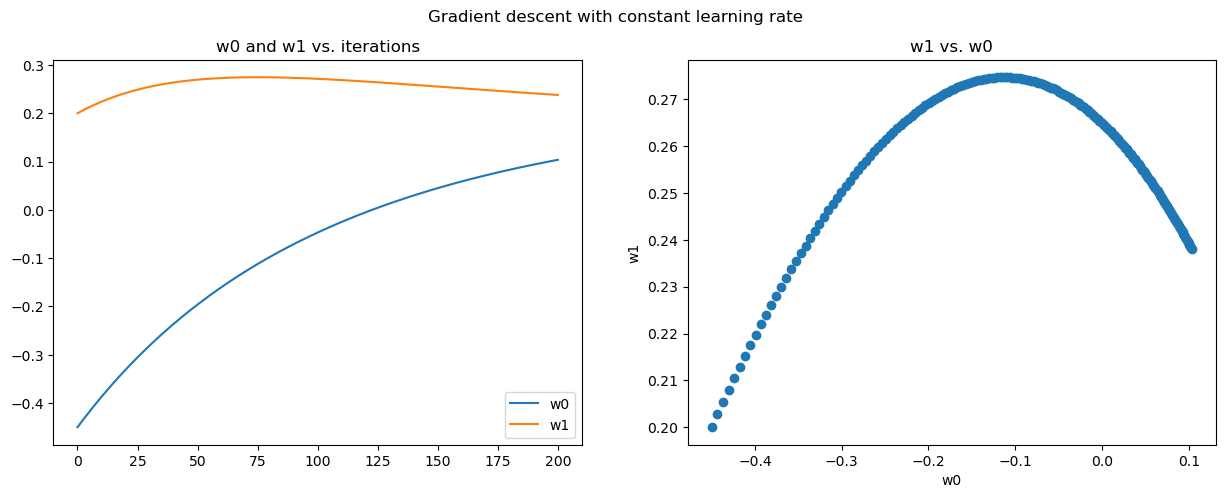

In [242]:
#Plot results
fig = plt.figure(figsize=(15,5))
fig.suptitle('Gradient descent with constant learning rate')
ax1 = fig.add_subplot(1,2,1)

plt.plot(w[0,:], label = 'w0')
plt.plot(w[1,:], label = 'w1')
plt.legend()
plt.title('w0 and w1 vs. iterations')

ax2 = fig.add_subplot(1,2,2)
plt.scatter(w[0,:], w[1,:])
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs. w0')

### Line Search

In [243]:
#2x1
w = w1
nu = 0.01
#2x2
H = 1/3 * X @ X.T
for i in np.arange(42):
    #2x1
    g = (H @ w[:,i]).reshape(2,1) - 1/3 * X @ Y_true.T
    #optimal step size
    nu = g.T@g/(g.T@(H@g))
    #2x1
    new_w = (w[:,i]).reshape(2,1) - nu * g
    #2xi
    w = np.append(w, new_w, axis = 1)
    

Text(0.5, 1.0, 'w1 vs. w0')

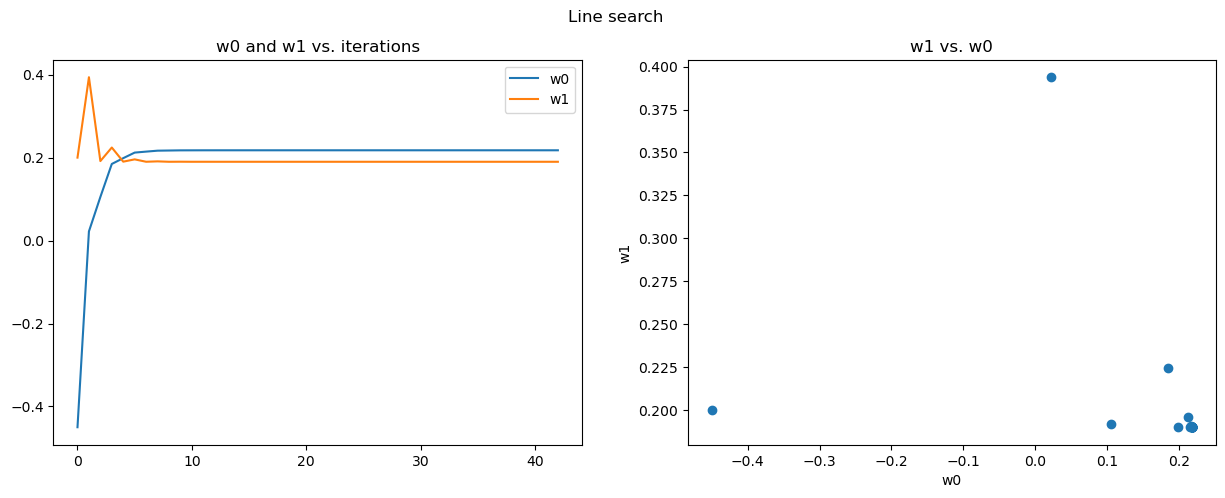

In [244]:
#Plot results
fig = plt.figure(figsize=(15,5))
fig.suptitle('Line search')
ax1 = fig.add_subplot(1,2,1)

plt.plot(w[0,:], label = 'w0')
plt.plot(w[1,:], label = 'w1')
plt.legend()
plt.title('w0 and w1 vs. iterations')

ax2 = fig.add_subplot(1,2,2)
plt.scatter(w[0,:], w[1,:])
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs. w0')


### Conjugate Gradient

In [245]:
g = lambda w: (H @ w).reshape(2,1) - 1/3 * X @ Y_true.T

In [246]:
w1 = np.array([[-0.45, 0.2]]).T
w = w1
d1 = -g(w1)
d = d1
d[:,0].shape


(2,)

In [247]:
tol = 10e-3
#2x2
H = 1/3 * X @ X.T
g = (H @ w1).reshape(2,1) - 1/3 * X @ Y_true.T

print(new_w)
t=0
for t in np.arange(300):
    
    #optimal step size
    nt = d[:,t].T@g[:,t]/(d[:,t].T@(H@d[:,t]))
    #2x1
    new_w = w[:,t].reshape(2,1) - nt * d[:,t].reshape(2,1)
    w = np.append(w, new_w, axis = 1)
    
    new_g = (H @ new_w).reshape(2,1) - 1/3 * X @ Y_true.T
    g = np.append(g, new_g, axis = 1)
    
    new_d = new_g - ((new_g.T@new_g)/(g[:,t].T@g[:,t])) * d[:,t]
    d = np.append(d, new_d, axis = 1)
    
    error = LA.norm(new_w - w[:,t])
    
#What is the convergence rate of the algorithm? -----> Convergence theorem 



[[0.21767305]
 [0.18998527]]


Text(0.5, 1.0, 'w1 vs. w0')

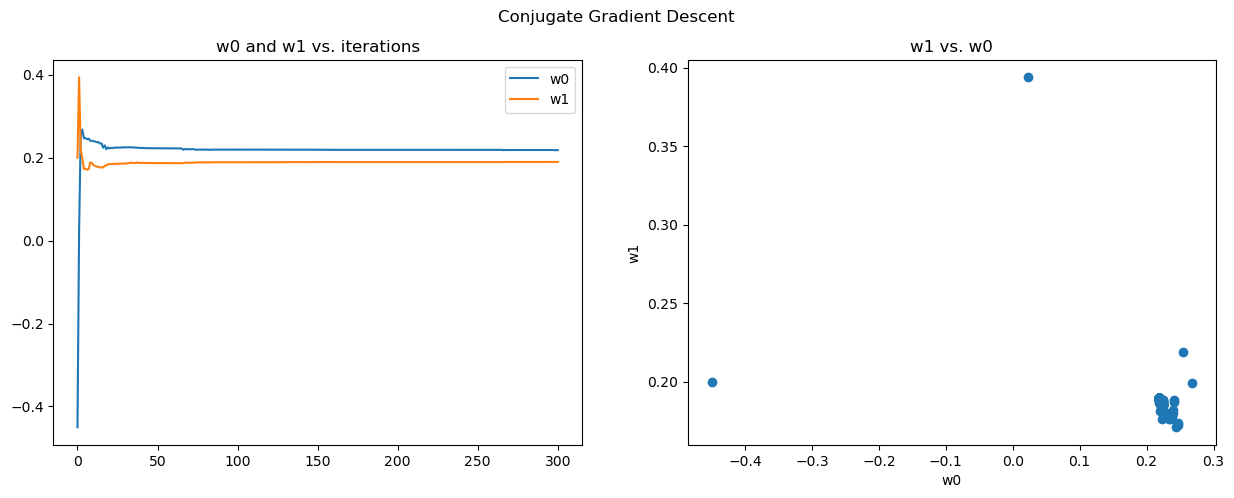

In [248]:
#Plot results
fig = plt.figure(figsize=(15,5))
fig.suptitle('Conjugate Gradient Descent')
ax1 = fig.add_subplot(1,2,1)

plt.plot(w[0,:], label = 'w0')
plt.plot(w[1,:], label = 'w1')
plt.legend()
plt.title('w0 and w1 vs. iterations')

ax2 = fig.add_subplot(1,2,2)
plt.scatter(w[0,:], w[1,:])
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs. w0')